Нейронная сеть, которая будет рекомендовать соотношение матрица-наполнитель

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
tf.random.set_seed
import seaborn as sns
import plotly.express as px
import tensorflow as tf
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error
from tensorflow import keras as keras
from keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Activation
from pandas import read_excel, DataFrame, Series
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from tensorflow.keras.models import Sequential
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings("ignore")
import absl.logging
absl.logging.set_verbosity(absl.logging.ERROR)

In [46]:
#Загрузим датасет:
ds1 = pd.read_excel(r"D:/мгту им Баумана/ВКР_Новикова_Е.Г/Norm/Norm.xlsx")

In [47]:
# Зададим вход и выход для модели нейронной сети: на входе будет весь датасет,  а на выходе - набор соотношений матрица-наполнитель
mn = ds1['Соотношение матрица-наполнитель']
mn_v = ds1.loc[:, ds1.columns != 'Соотношение матрица-наполнитель']

In [48]:
mn.shape

(922,)

In [49]:
mn_v.shape

(922, 13)

In [50]:
# Разделим выборку на обучающую и тестовую
x_train, x_test, y_train, y_test = train_test_split(mn_v, mn, test_size = 0.3, random_state = 42)

Строим полносвязную нейронную сеть (feed forward neural network). 
Выходной слой с одним линейным нейроном — для задачи регрессии. Функция активации — RELU в промежуточном слое и sigmoid в выходном. 

In [150]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # sigmoid, т.к. данные от 0 до 1

In [106]:
print(model.summary()) # архитектура нашей модели

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 32)                448       
                                                                 
 dense_28 (Dense)            (None, 16)                528       
                                                                 
 dense_29 (Dense)            (None, 1)                 17        
                                                                 
Total params: 993
Trainable params: 993
Non-trainable params: 0
_________________________________________________________________
None


In [109]:
# Компилируем сеть
# Т.к. задача регрессии, удобнее использовать mean square error(средне-квадратичная ошибка).
# В качестве метрики берем mean absolute error (средний модуль ошибки)
model.compile('RMSProp', metrics=[tf.keras.metrics.MeanAbsoluteError()])
model.compile(optimizer='RMSProp', loss='mse', metrics=['mae'])

In [110]:
# И обучаем:

history = model.fit(x_train, 
                    y_train, 
                    epochs=100, 
                    validation_split=0.1, 
                    verbose=2)

Epoch 1/100
19/19 - 1s - loss: 0.2597 - mae: 0.4667 - val_loss: 0.2464 - val_mae: 0.4472 - 832ms/epoch - 44ms/step
Epoch 2/100
19/19 - 0s - loss: 0.2559 - mae: 0.4630 - val_loss: 0.2728 - val_mae: 0.4861 - 47ms/epoch - 2ms/step
Epoch 3/100
19/19 - 0s - loss: 0.2627 - mae: 0.4713 - val_loss: 0.2824 - val_mae: 0.4949 - 42ms/epoch - 2ms/step
Epoch 4/100
19/19 - 0s - loss: 0.2599 - mae: 0.4692 - val_loss: 0.2798 - val_mae: 0.4917 - 43ms/epoch - 2ms/step
Epoch 5/100
19/19 - 0s - loss: 0.2609 - mae: 0.4683 - val_loss: 0.2567 - val_mae: 0.4602 - 29ms/epoch - 2ms/step
Epoch 6/100
19/19 - 0s - loss: 0.2656 - mae: 0.4729 - val_loss: 0.2512 - val_mae: 0.4520 - 43ms/epoch - 2ms/step
Epoch 7/100
19/19 - 0s - loss: 0.2508 - mae: 0.4536 - val_loss: 0.2497 - val_mae: 0.4502 - 43ms/epoch - 2ms/step
Epoch 8/100
19/19 - 0s - loss: 0.2537 - mae: 0.4583 - val_loss: 0.2544 - val_mae: 0.4569 - 43ms/epoch - 2ms/step
Epoch 9/100
19/19 - 0s - loss: 0.2452 - mae: 0.4513 - val_loss: 0.2470 - val_mae: 0.4471 - 44m

9/9 [==============================] - 0s 917us/step


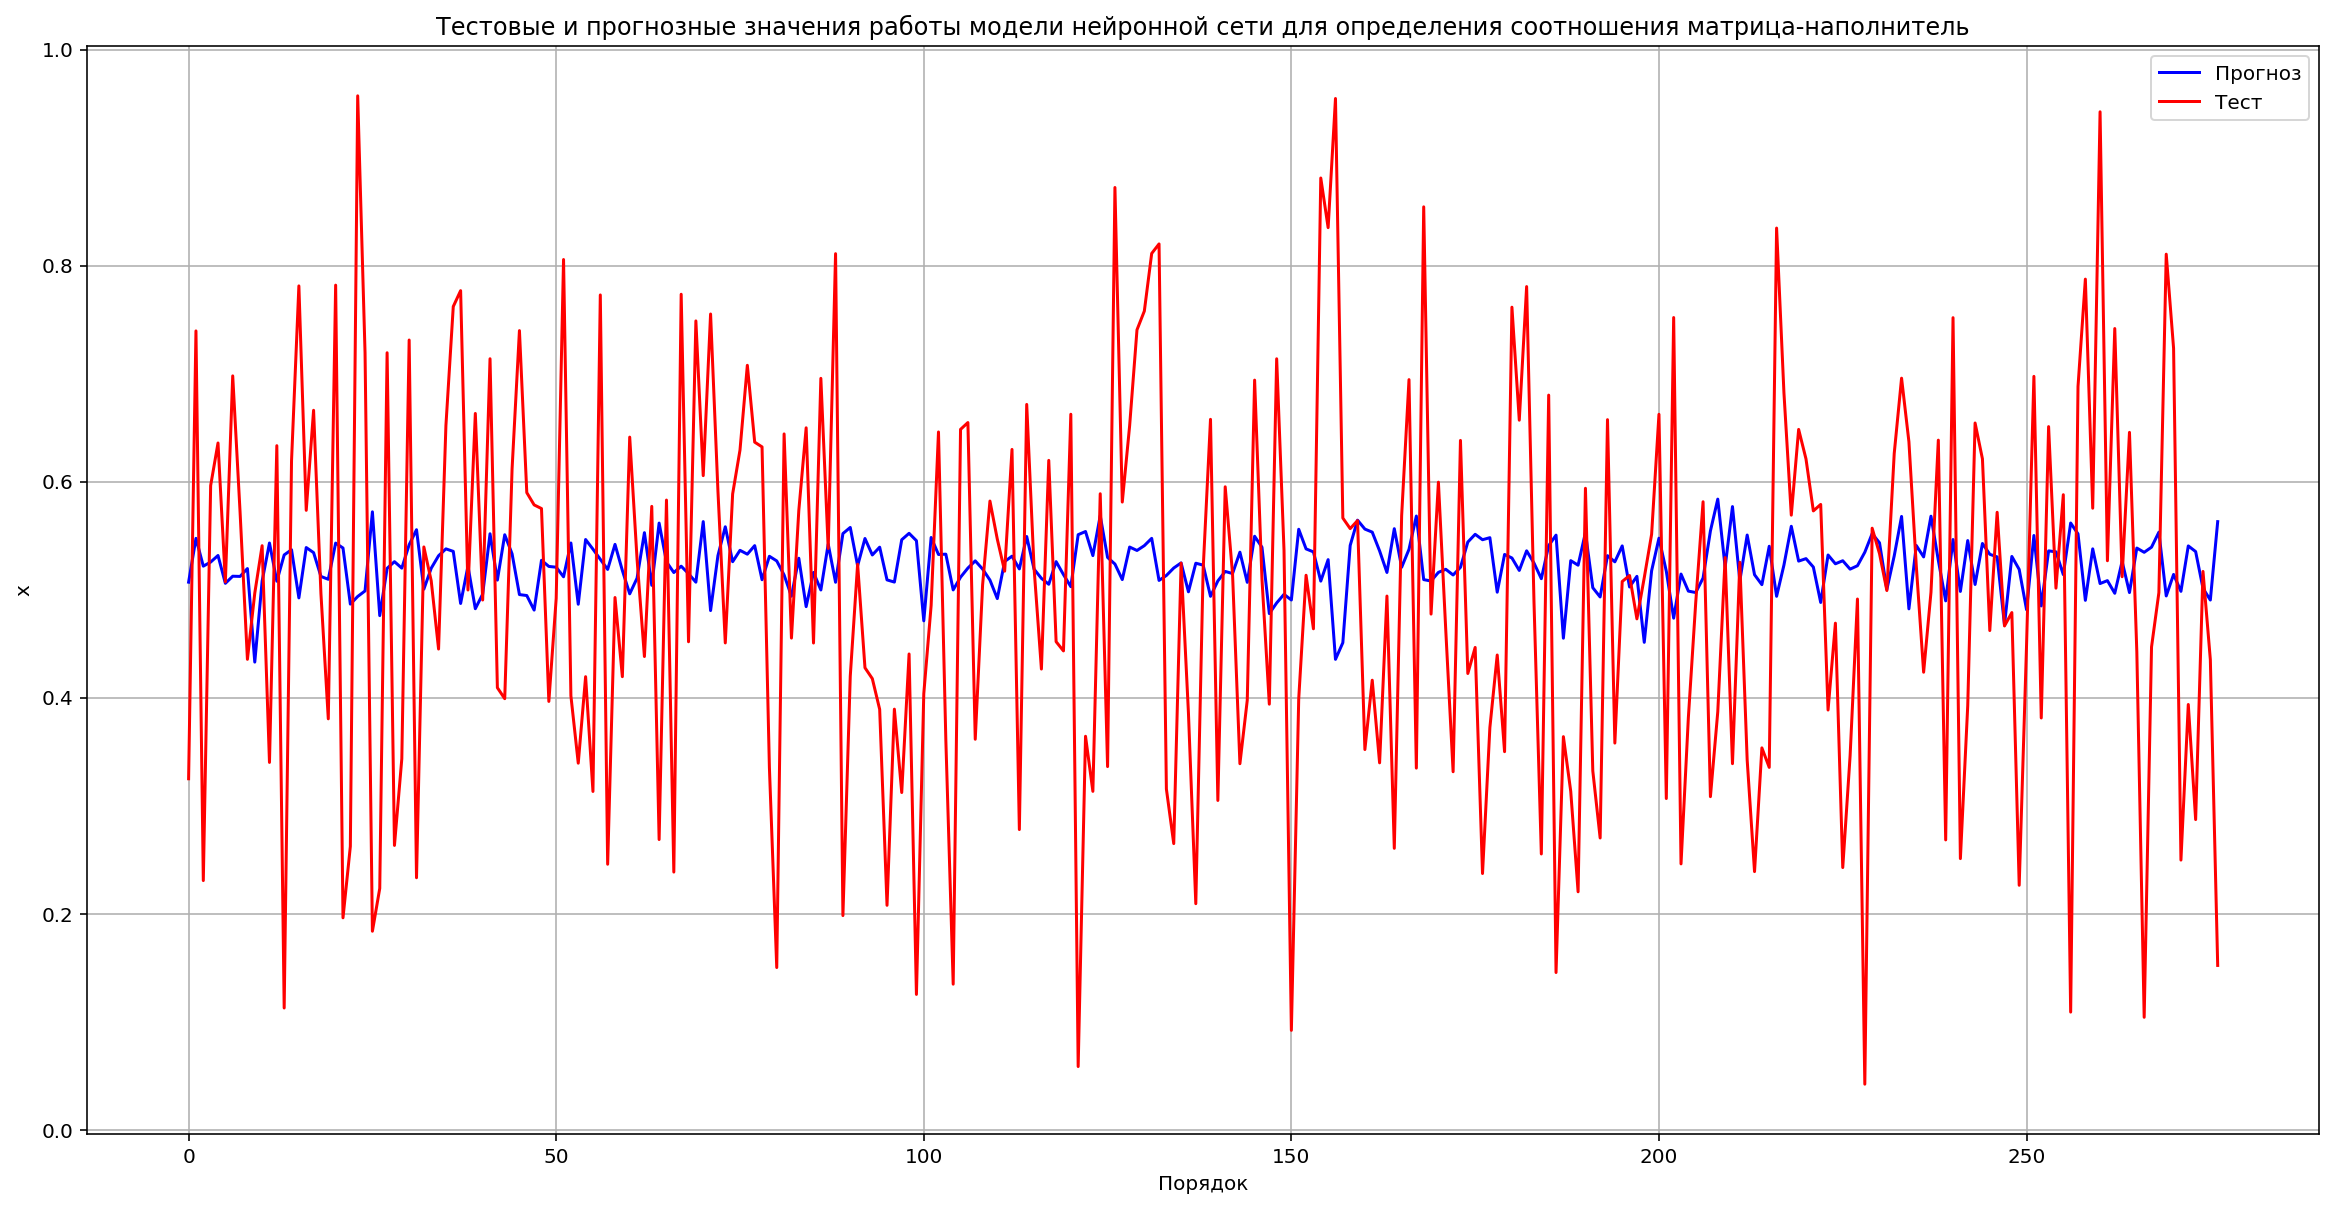

In [137]:
# Визуализация модели НС для соотношения матрица-наполнитель:
y_pred_ns = model.predict(x_test)
ns = model
# Визуализируем полученные результаты работы модели K-Neighbors Regressor:
plt.figure(figsize = (20, 10))
plt.title("Тестовые и прогнозные значения работы модели нейронной сети для определения соотношения матрица-наполнитель")
plt.plot(y_pred_ns, label = "Прогноз", color = 'blue')
plt.plot(y_test.values, label = "Тест", color = 'red')
plt.xlabel("Порядок")
plt.ylabel("х")
plt.legend()
plt.grid(True)


In [138]:
# Делаем прогноз. Возвращается копия предсказания в виде одномерного массива
pred = model.predict(x_test).flatten() 

9/9 [==============================] - 0s 949us/step


In [139]:
# Проверяем, какая ошибка (средний модуль отклонения) получилась:

# Средний модуль отклонения 
err = np.mean(abs(pred - y_test))
print(err)

0.15332648941229257


И получаем довольно хорошую ошибку при том, что вся процедура подбора модели предсказания прошла без нашего участия. В случае с классической регрессией пришлось бы посидеть немало времени, чтобы сделать необходимые преобразования исходных данных, которые можно было бы использовать для построения функции регрессии. Но в этом случае бонусом было бы то, что мы смогли бы увидеть полученную функцию. В случае нейронки полученная модель — «черный ящик».

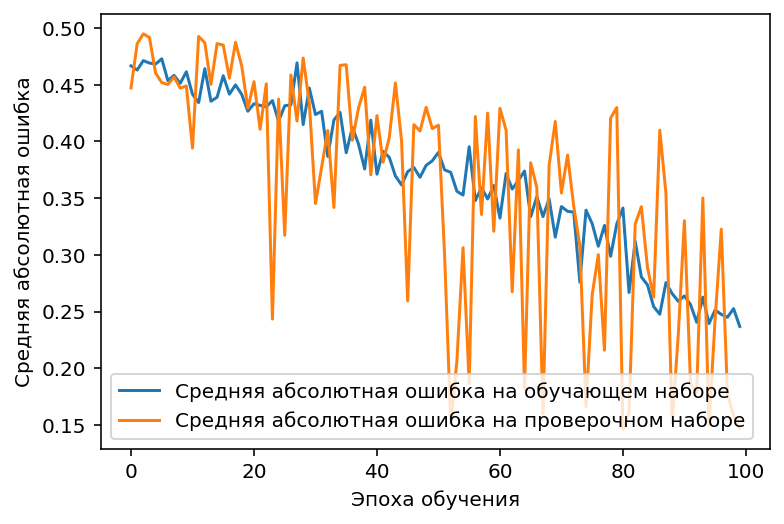

In [140]:
# Считаем графики ошибки
plt.plot(history.history['mae'], 
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_mae'], 
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.legend()
plt.show()

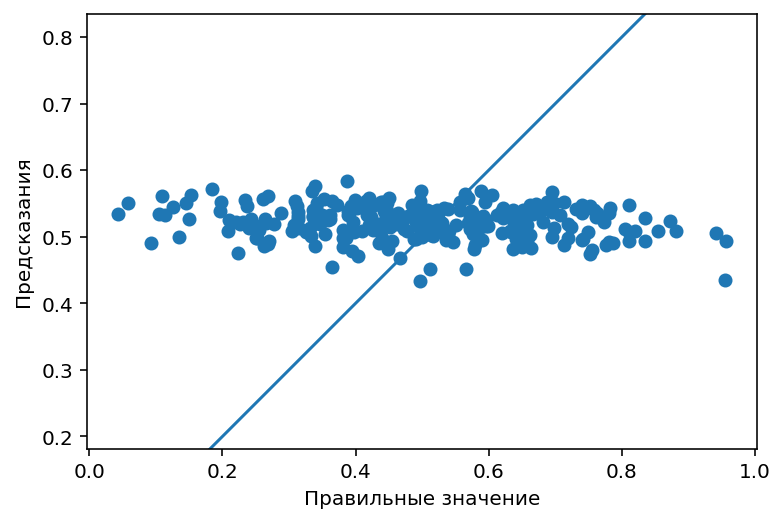

In [141]:
# Разброс предсказаний может показать перекос, если есть
plt.scatter(y_test, pred) 
plt.xlabel('Правильные значение')
plt.ylabel('Предсказания')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.plot([-100, 100], [-100, 100])
plt.show()

Видно, что результаты предсказания довольно плохо укладываются относительно верных результатов. Либо ошибка в данных, либо что-то некорректно...

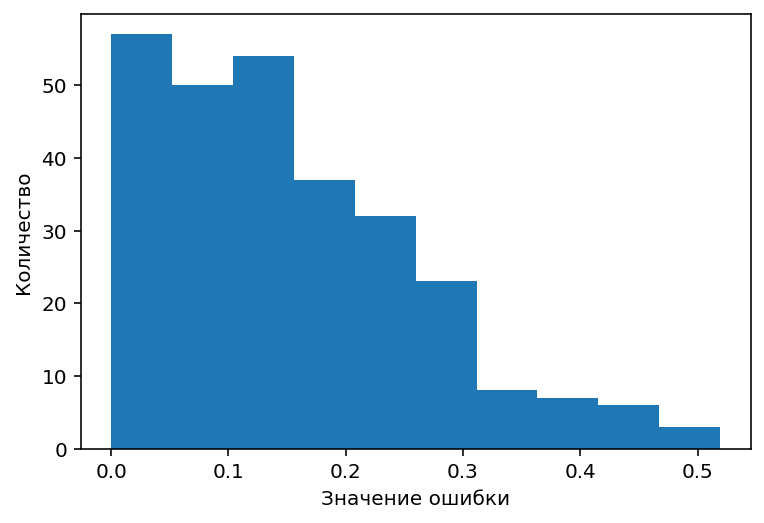

In [142]:
# Гистограмма ошибок следующая:

#Разность предсказанного и правильного ответа
error = pred - y_test
#Построение гистограммы
plt.hist(abs(error), bins = 10)
plt.xlabel("Значение ошибки")
plt.ylabel("Количество")
plt.show()

<AxesSubplot:>

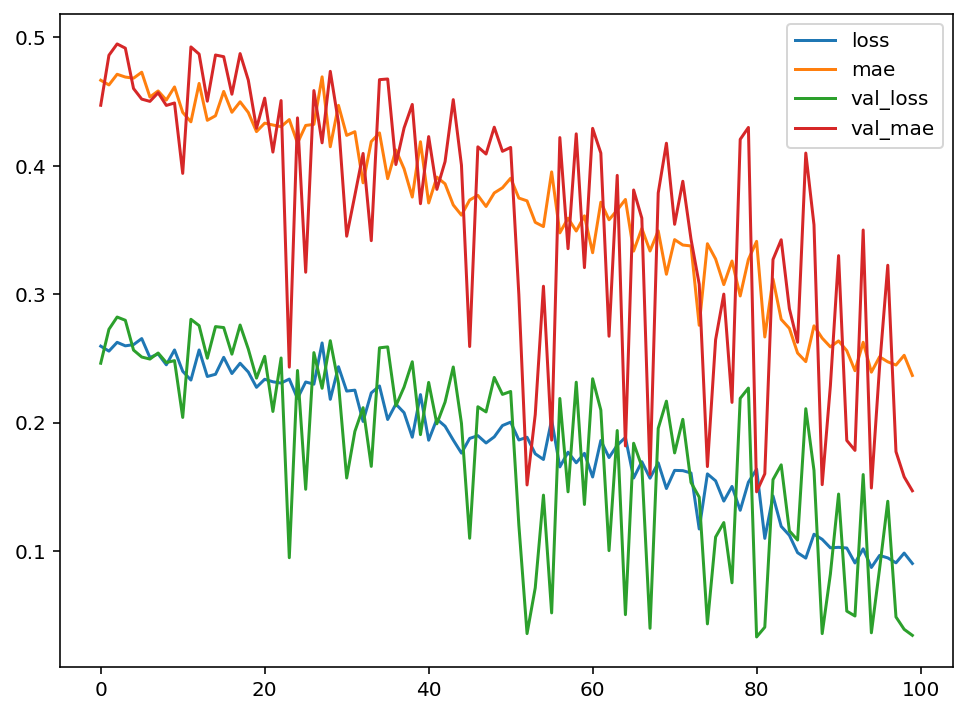

In [143]:
pd.DataFrame(history.history).plot(figsize=(8,6)) # метрики и функции потерь

In [144]:
# оценим модель:
mae_ns_train = mean_absolute_error(y_train, model.predict(x_train.values))
mae_ns_test = mean_absolute_error(y_test, model.predict(x_test.values))
mse_ns_train = mean_squared_error(y_train, model.predict(x_train.values))
mse_ns_test = mean_squared_error(y_test, model.predict(x_test.values))
R2_ns_train = r2_score(y_train, model.predict(x_train.values))
R2_ns_test = r2_score(y_test, model.predict(x_test.values))

print('mae_ns_train на тренировочной выборке: %.3f' %mean_absolute_error(y_train, model.predict(x_train)))
print('mae_ns_test на тестовой выборке: %.3f' %mean_absolute_error(y_test, model.predict(x_test)))
print('mse_ns_train на тренировочной выборке: %.3f' %mean_squared_error(y_train, model.predict(x_train)))
print('mse_ns_test на тестовой выборке: %.3f' %mean_squared_error(y_test, model.predict(x_test)))
print("R2_ns_test на тестовой выборке: {:.2f}".format(r2_score(y_test, model.predict(x_test.values))))
print("R2_ns_train на тренировочной выборке: {:.2f}".format(r2_score(y_train, model.predict(x_train.values))))



21/21 [==============================] - 0s 902us/step
mae_ns_train на тренировочной выборке: 0.153
9/9 [==============================] - 0s 3ms/step
mae_ns_test на тестовой выборке: 0.153
21/21 [==============================] - 0s 339us/step
mse_ns_train на тренировочной выборке: 0.036
9/9 [==============================] - 0s 2ms/step
mse_ns_test на тестовой выборке: 0.036
9/9 [==============================] - 0s 846us/step
R2_ns_test на тестовой выборке: -0.08
21/21 [==============================] - 0s 645us/step
R2_ns_train на тренировочной выборке: -0.01


In [149]:
#сведем результаты работы нейросети по основным исследуемым метрикам в таблицу:
df_ns = {'Модель': ['NS_train', 'NS_test'], 'MAE': [mae_ns_train, mae_ns_test], 'MSE':[mse_ns_train, mse_ns_test], 'R2':[R2_ns_train, R2_ns_test]} 
df_ns = pd.DataFrame(df_ns)
df_ns

,Модель,MAE,MSE,R2
0,NS_train,0.153048,0.036360,-0.011632
1,NS_test,0.153326,0.036223,-0.076665


Сохранение модели

In [119]:
keras_model_path_1 = "my_keras_model.h5"
model.save("D:\мгту им Баумана\ВКР_Новикова_Е.Г\model for app")

INFO:tensorflow:Assets written to: D:\мгту им Баумана\ВКР_Новикова_Е.Г\model for app\assets


INFO:tensorflow:Assets written to: D:\мгту им Баумана\ВКР_Новикова_Е.Г\model for app\assets


In [120]:
model.save(keras_model_path_1, save_format="h5")

Загрузка модели

In [121]:
reconstructed_model = keras.models.load_model(keras_model_path_1)

In [122]:
reconstructed_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 32)                448       
                                                                 
 dense_28 (Dense)            (None, 16)                528       
                                                                 
 dense_29 (Dense)            (None, 1)                 17        
                                                                 
Total params: 993
Trainable params: 993
Non-trainable params: 0
_________________________________________________________________
